In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from functools import partial

In [21]:
DATA_DIR = Path('../data')

files = DATA_DIR.glob('*.txt')
df = pd.concat(map(partial(pd.read_csv, parse_dates=['acq_date']), files))

In [32]:
df

latitude  longitude  brightness  scan  track   acq_date acq_time  \
0      -19.419    138.621       341.5   1.3    1.1 2019-12-28    01:15   
1      -26.471    125.788       331.9   2.4    1.5 2019-12-28    01:15   
2      -26.464    125.782       333.6   2.4    1.5 2019-12-28    01:15   
3      -27.679    128.172       370.0   1.6    1.2 2019-12-28    01:15   
4      -27.682    128.188       395.9   1.6    1.2 2019-12-28    01:15   
...        ...        ...         ...   ...    ...        ...      ...   
3158   -31.449    151.829       355.4   1.9    1.4 2019-12-04    23:35   
3159   -31.453    151.849       336.3   1.9    1.4 2019-12-04    23:35   
3160   -35.507    149.999       374.3   2.0    1.4 2019-12-04    23:35   
3161   -35.507    149.992       373.4   2.0    1.4 2019-12-04    23:35   
3162   -35.512    150.014       332.7   2.0    1.4 2019-12-04    23:35   

     satellite  confidence version  bright_t31    frp daynight  
0            T          85  6.0NRT       311.7   33.5        D  
1            T          50  6.0NRT       312.7   26.2        D  
2            T          65  6.0NRT       313.4   36.0        D  
3            T         100  6.0NRT       321.0  174.1        D  
4            T         100  6.0NRT       329.7  388.6        D  
...        ...         ...     ...         ...    ...      ...  
3158         T          97  6.0NRT       306.8  165.5        D  
3159         T          65  6.0NRT       304.6   65.6        D  
3160         T           0  6.0NRT       269.8  356.1        D  
3161         T           0  6.0NRT       269.8  347.9        D  
3162         T           0  6.0NRT       268.0   79.5        D  

[122822 rows x 13 columns]

## Counting Fires

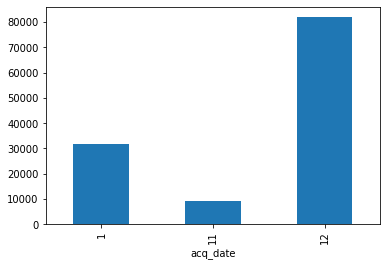

In [34]:
df.groupby(df.set_index(df.acq_date).index.month).count().latitude.plot.bar()

## Counting KMs

#### TODO

- [ ] ask Francesco

In [35]:
import seaborn as sns

## Export

In [87]:
df.to_csv(DATA_DIR / 'data.csv', header=False, index=False)

## Import to Mongo

In [92]:
!mongoimport --collection=fires --db=fires --file='/home/francesco/Documents/AustraliaFires/data/data.csv' --type=csv  --drop --columnsHaveTypes --fields="latitude.double(),longitude.double(),brightness.double(),scan.double(),track.double(),acq_date.date(2006-01-02),acq_time.string(),satellite.string(),confidence.int32(),version.string(),bright_t31.double(),frp.double(),daynight.string()" 

2020-01-22T21:10:21.081+0100	connected to: localhost
2020-01-22T21:10:21.081+0100	dropping: fires.fires
2020-01-22T21:10:22.846+0100	imported 122822 documents


In [3]:
from pymongo import MongoClient 

client = MongoClient()
db = client.fires
fires = db.fires

### Getting them back

In [4]:
fires.find_one({})

{'_id': ObjectId('5e28ac2d8af1573f087dddf2'),
 'latitude': -19.419,
 'longitude': 138.621,
 'brightness': 341.5,
 'scan': 1.3,
 'track': 1.1,
 'acq_date': datetime.datetime(2019, 12, 28, 0, 0),
 'acq_time': '01:15',
 'satellite': 'T',
 'confidence': 85,
 'version': '6.0NRT',
 'bright_t31': 311.7,
 'frp': 33.5,
 'daynight': 'D'}